<a href="https://colab.research.google.com/github/hilalkilic1/ML/blob/main/Fetal_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [9]:
cols = ["baseline_value",
        "accelerations",
        "fetal_movement",
        "uterine_contractions",
        "light_decelerations",
        "severe_decelerations",
        "prolongued_decelerations",
        "abnormal_short_term_variability",
        "mean_value_of_short_term_variability",
        "percentage_of_time_with_abnormal_long_term_variability",
        "mean_value_of_long_term_variability",
        "histogram_width",
        "histogram_min",
        "histogram_max",
        "histogram_number_of_peaks",
        "histogram_number_of_zeroes",
        "histogram_mode",
        "histogram_mean",
        "histogram_median",
        "histogram_variance",
        "histogram_tendency",
        "fetal_health"]
print(len(cols))
print(len(df['fetal_health']))

22
2126


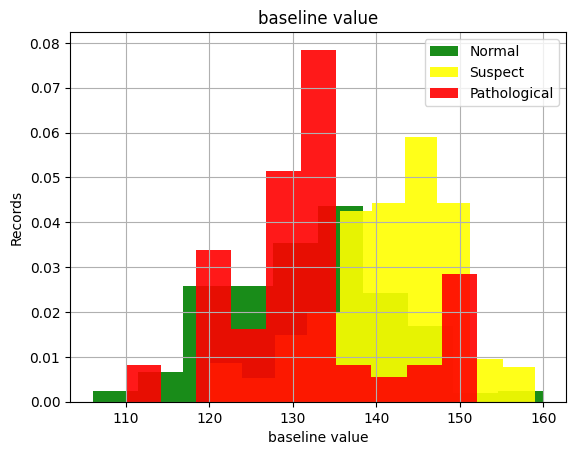

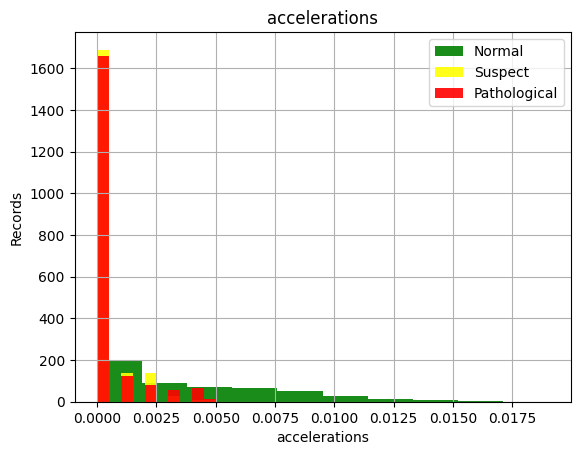

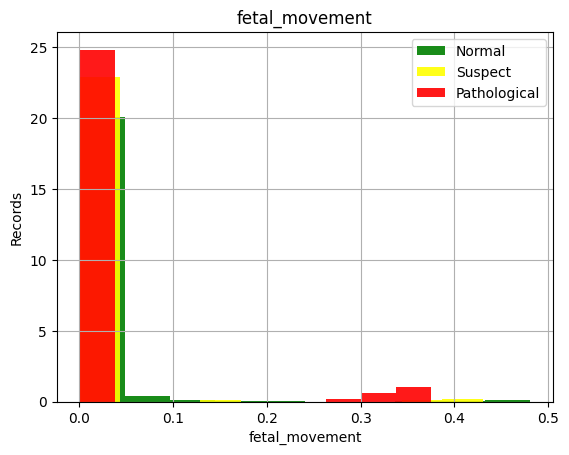

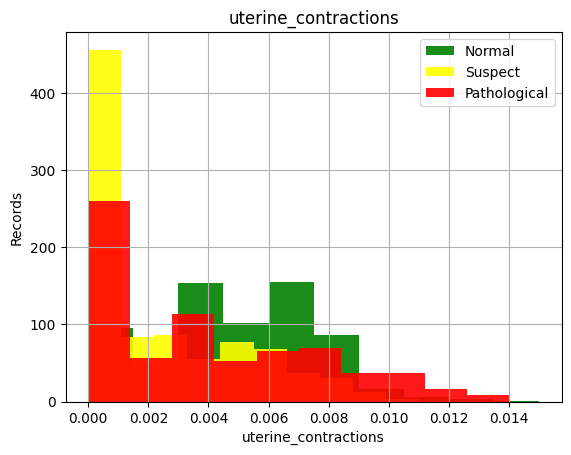

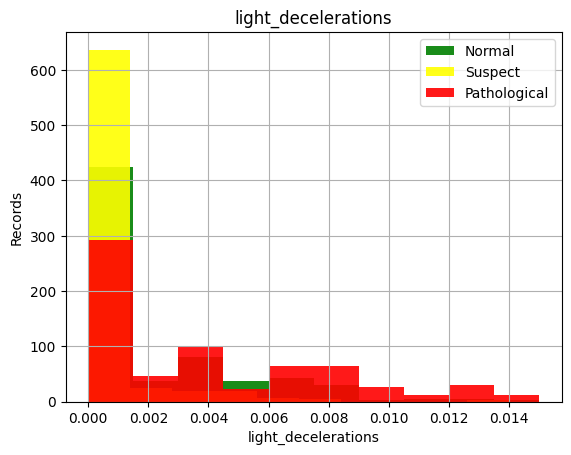

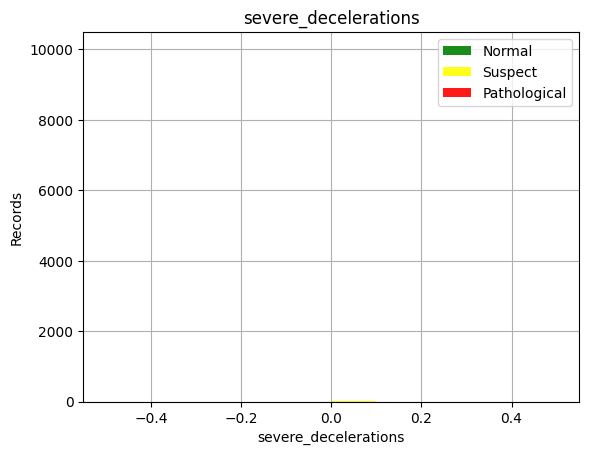

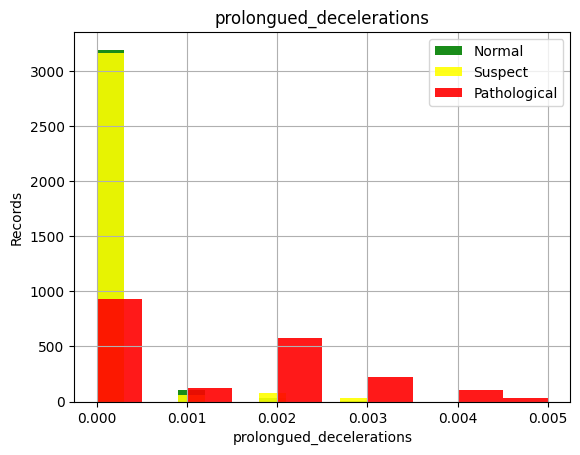

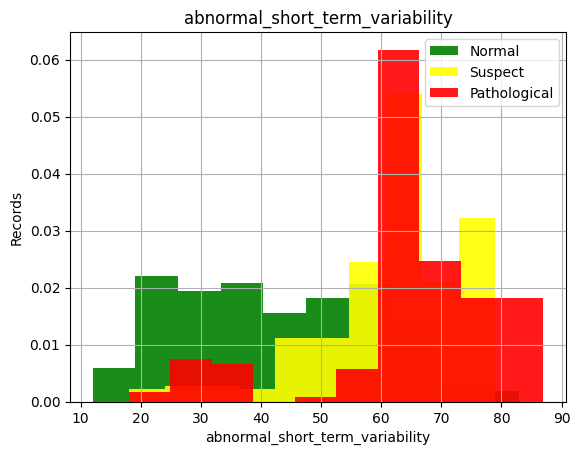

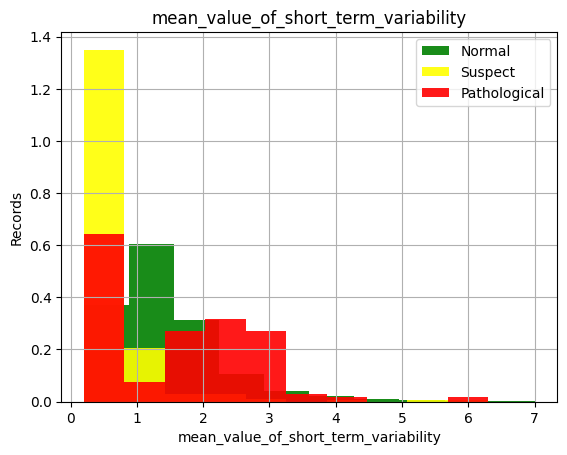

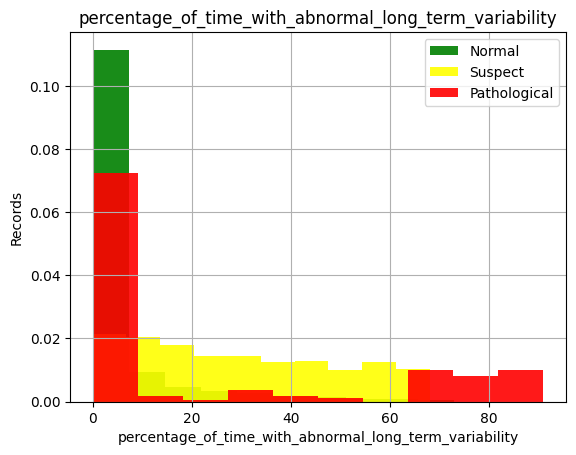

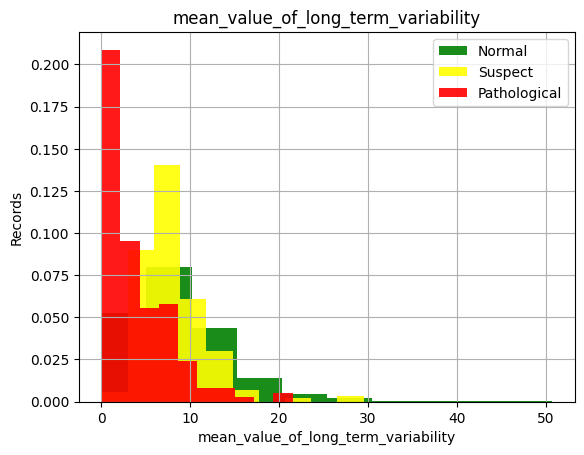

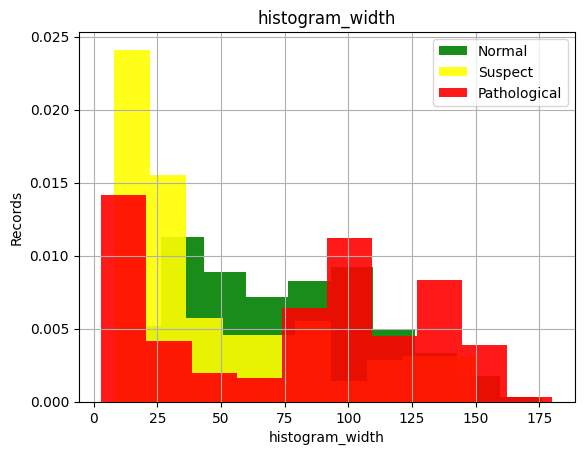

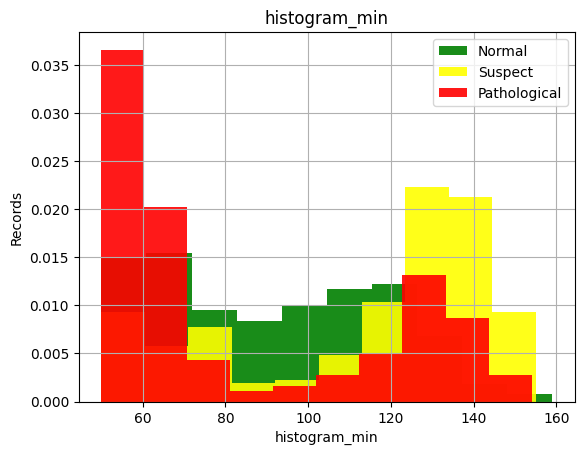

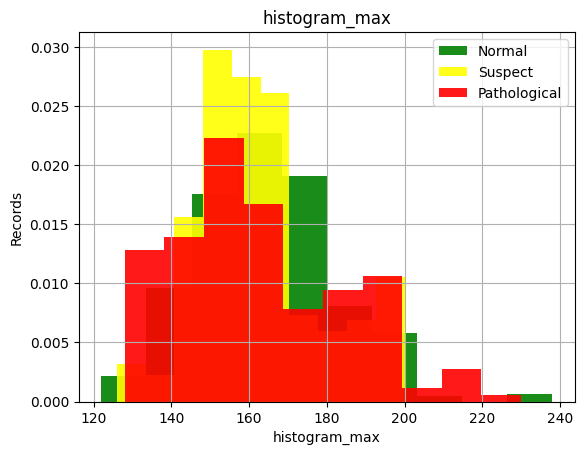

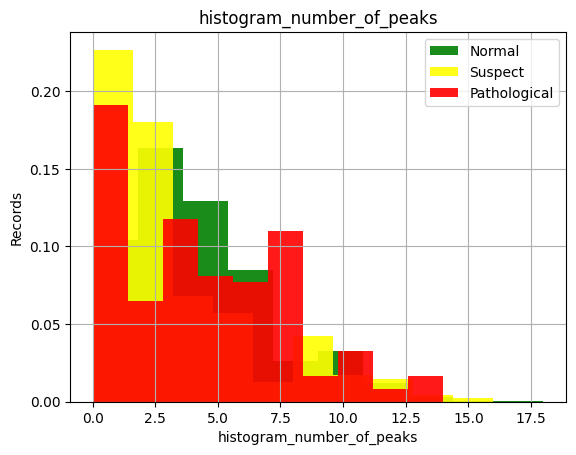

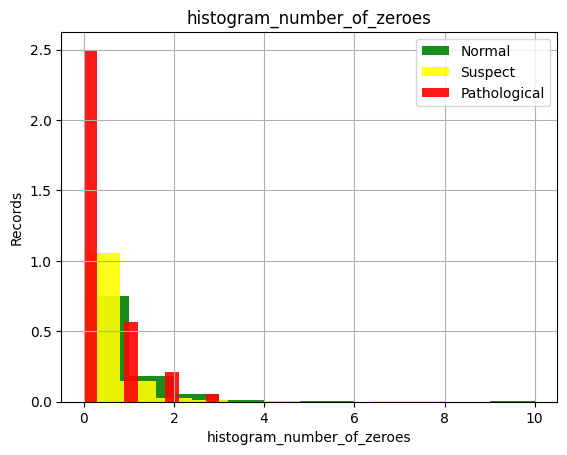

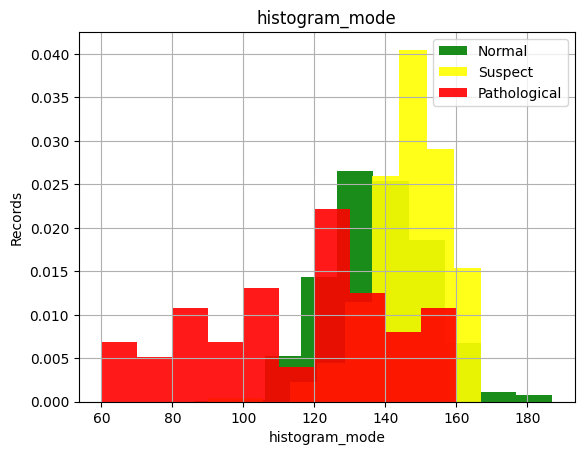

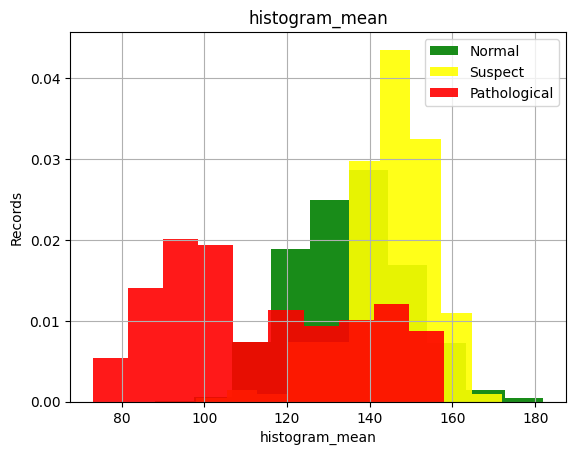

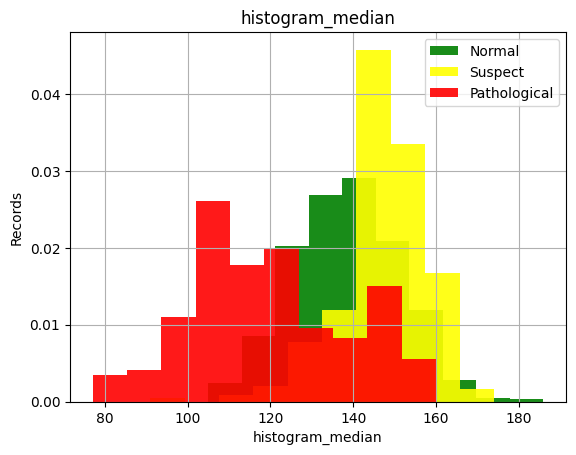

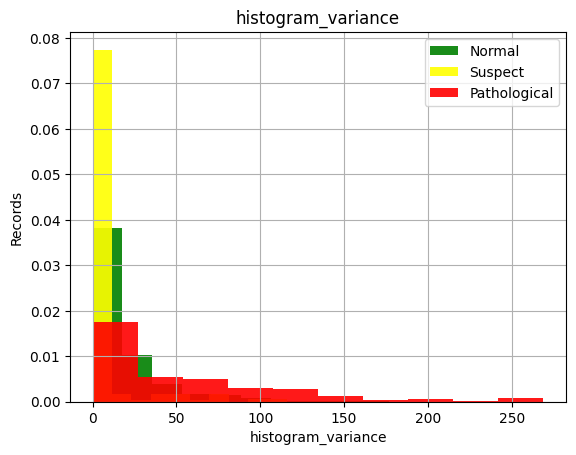

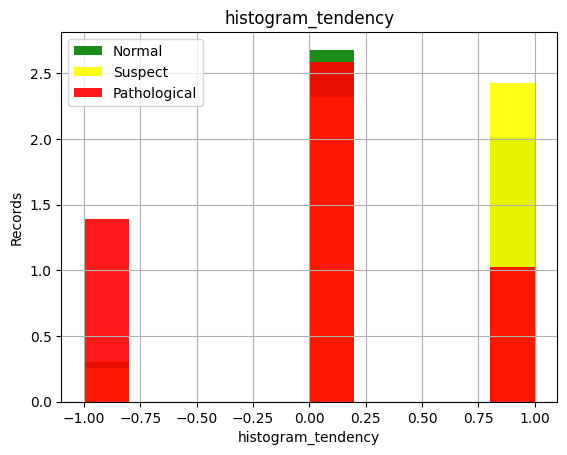

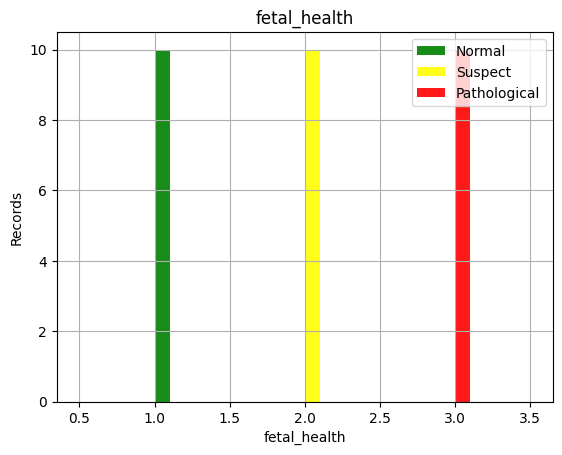

In [ ]:
for label in cols:
  plt.hist(df[df['fetal_health']==1][label], color = "green", label = "Normal", alpha = 0.9, density = True)
  plt.hist(df[df['fetal_health']==2][label], color = "yellow", label = "Suspect", alpha = 0.9, density = True)
  plt.hist(df[df['fetal_health']==3][label], color = "red", label = "Pathological", alpha = 0.9, density = True)
  plt.xlabel(label)
  plt.ylabel("Records")
  plt.title(label)
  plt.legend()
  plt.grid()
  plt.show()


# ***TRAIN, VALIDATION AND TEST DATASETS***

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_datasets(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X, np.reshape(Y, (-1, 1))))

  return data, X, Y

In [ ]:
print(len(train[train['fetal_health']==1]))
print(len(train[train['fetal_health']==2]))
print(len(train[train['fetal_health']==3]))

991
188
96


In [ ]:
train, X_train, Y_train = scale_datasets(train, oversample = True)
valid, X_valid, Y_valid = scale_datasets(valid, oversample = False)
test, X_test, Y_test = scale_datasets(test, oversample = False)

In [ ]:
k